<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-157.741854,51.048904,225.805086,-174.756182
1,0.0,1.0,36.984514,69.001506,71.195387,154.792986,341.974393,143.605896,198.368497
2,0.0,2.0,29.002641,52.516165,22.032962,-159.331332,-45.779564,47.867945,-93.647508
3,0.0,3.0,71.767835,63.553258,67.356160,-174.324826,38.352428,276.179407,-237.826979
4,0.0,4.0,94.424272,89.406628,91.107042,224.704244,509.642186,470.837971,38.804215
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,95.848117,234.702580,125.949412,108.753168
19996,999.0,16.0,65.496566,91.112681,98.989366,203.443215,469.041828,363.317994,105.723834
19997,999.0,17.0,95.088600,60.510366,57.021663,-48.410094,174.210534,209.396331,-35.185796
19998,999.0,18.0,62.162770,31.180357,75.595939,-137.814896,41.124170,166.133180,-125.009009


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    40.084527  87.621300  ...  225.805086 -174.756182
      1.0    36.984514  69.001506  ...  143.605896  198.368497
      2.0    29.002641  52.516165  ...   47.867945  -93.647508
      3.0    71.767835  63.553258  ...  276.179407 -237.826979
      4.0    94.424272  89.406628  ...  470.837971   38.804215
...                ...        ...  ...         ...         ...
999.0 15.0   38.657453  49.346113  ...  125.949412  108.753168
      16.0   65.496566  91.112681  ...  363.317994  105.723834
      17.0   95.088600  60.510366  ...  209.396331  -35.185796
      18.0   62.162770  31.180357  ...  166.133180 -125.009009
      19.0   45.994800  42.514986  ...  126.487247  -43.835313

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    40.084527  87.621300  ...  225.805086 -174.756182
      1.0    36.984514  69.001506  ...  143.605896  198.368497
      2.0    29.002641  52.516165  ...   47.867945  -93.647508
      3.0    71.767835  63.553258  ...  276.179407 -237.826979
      4.0    94.424272  89.406628  ...  470.837971   38.804215
...                ...        ...  ...         ...         ...
999.0 15.0   38.657453  49.346113  ...  125.949412  108.753168
      16.0   65.496566  91.112681  ...  363.317994  105.723834
      17.0   95.088600  60.510366  ...  209.396331  -35.185796
      18.0   62.162770  31.180357  ...  166.133180 -125.009009
      19.0   45.994800  42.514986  ...  126.487247  -43.835313

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-157.741854,51.048904,225.805086,-174.756182
1,0.0,1.0,36.984514,69.001506,71.195387,154.792986,341.974393,143.605896,198.368497
2,0.0,2.0,29.002641,52.516165,22.032962,-159.331332,-45.779564,47.867945,-93.647508
3,0.0,3.0,71.767835,63.553258,67.356160,-174.324826,38.352428,276.179407,-237.826979
4,0.0,4.0,94.424272,89.406628,91.107042,224.704244,509.642186,470.837971,38.804215
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,95.848117,234.702580,125.949412,108.753168
19996,999.0,16.0,65.496566,91.112681,98.989366,203.443215,469.041828,363.317994,105.723834
19997,999.0,17.0,95.088600,60.510366,57.021663,-48.410094,174.210534,209.396331,-35.185796
19998,999.0,18.0,62.162770,31.180357,75.595939,-137.814896,41.124170,166.133180,-125.009009


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    40.084527  87.621300  ...  225.805086 -174.756182
      1.0    36.984514  69.001506  ...  143.605896  198.368497
      2.0    29.002641  52.516165  ...   47.867945  -93.647508
      3.0    71.767835  63.553258  ...  276.179407 -237.826979
      4.0    94.424272  89.406628  ...  470.837971   38.804215
...                ...        ...  ...         ...         ...
999.0 15.0   38.657453  49.346113  ...  125.949412  108.753168
      16.0   65.496566  91.112681  ...  363.317994  105.723834
      17.0   95.088600  60.510366  ...  209.396331  -35.185796
      18.0   62.162770  31.180357  ...  166.133180 -125.009009
      19.0   45.994800  42.514986  ...  126.487247  -43.835313

[20000 rows x 7 columns]

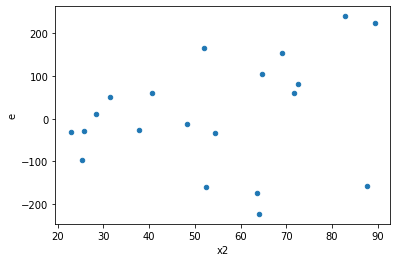

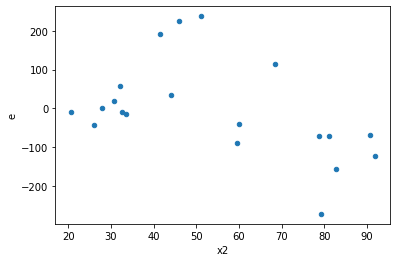

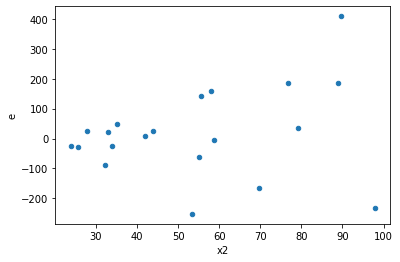

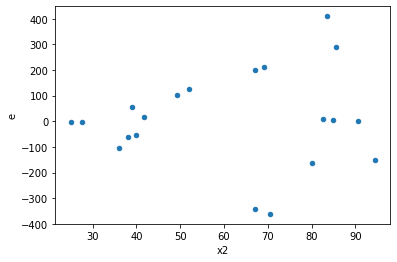

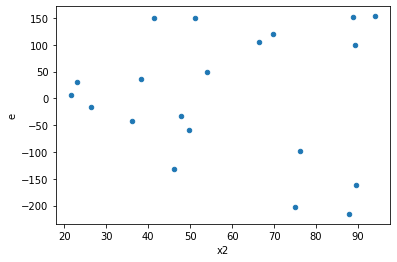

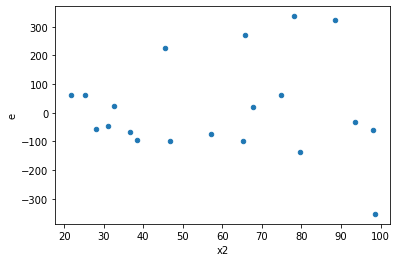

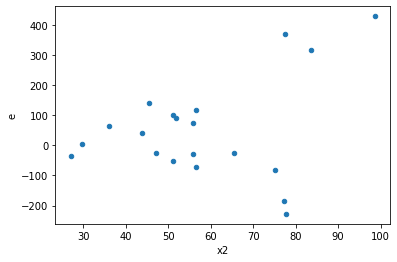

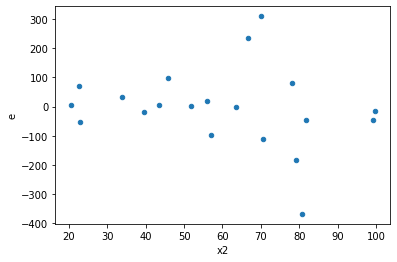

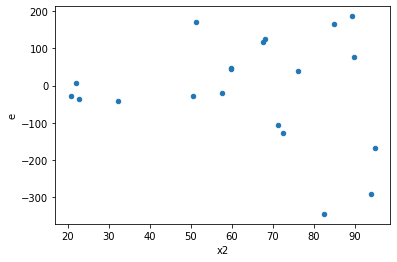

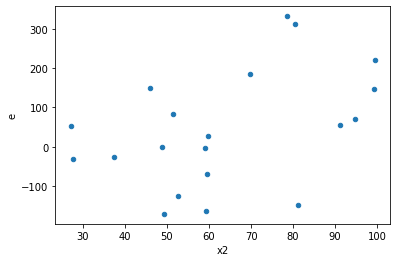

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,6.0,8.0,52190.282769683385,123246.85360489802,8698.380461613897,15405.856700612252,1.7711178268872652,0.44485012173441785,0.7775749391327911,0.22242506086720892,Reject001=1 : Homoscedasticity
9.0,5.0,9.0,41744.148562781804,242710.40986325036,8348.82971255636,26967.82331813893,3.2301321558373894,0.12099299406310116,0.9395035029684494,0.06049649703155058,Reject001=1 : Homoscedasticity
13.0,6.0,8.0,54949.52897053495,161361.69355851668,9158.254828422492,20170.211694814585,2.2024077810345117,0.29814394757746965,0.8509280262112652,0.14907197378873482,Reject001=1 : Homoscedasticity
14.0,9.0,5.0,42201.575584094375,54950.9878942219,4689.0639537882635,10990.19757884438,2.34379349208182,0.36122836930990365,0.8193858153450482,0.18061418465495183,Reject001=1 : Homoscedasticity
15.0,7.0,7.0,38178.07843919252,365219.0655576086,5454.011205598931,52174.15222251551,9.566198208202254,0.008029320928207184,0.9959853395358964,0.004014660464103592,Reject001=0 : Heteroscedasticity
17.0,10.0,4.0,56360.975251211996,85133.48976999972,5636.097525121199,21283.37244249993,3.7762604972032046,0.21211390494235394,0.893943047528823,0.10605695247117697,Reject001=1 : Homoscedasticity
19.0,6.0,8.0,86957.4372845462,154464.47214624044,14492.906214091034,19308.059018280055,1.3322420453882042,0.6882677830217194,0.6558661084891403,0.3441338915108597,Reject001=1 : Homoscedasticity
23.0,7.0,7.0,29748.692887695994,231863.23701960506,4249.813269670856,33123.319574229296,7.794064697057776,0.01466684357068182,0.9926665782146591,0.00733342178534091,Reject001=1 : Homoscedasticity
24.0,7.0,7.0,56951.29883332717,63620.53106572652,8135.899833332453,9088.647295103789,1.1171041287735584,0.8876034685394523,0.5561982657302739,0.44380173426972613,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,168309.47981427927,21363.69973577734,18701.053312697695,4272.739947155468,0.22847589789257222,0.05361140884608162,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,63627.567573720175,88130.11154254987,12725.513514744034,9792.234615838875,0.7694962253973796,0.8107662797821544,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,126638.0262478102,36094.091468549996,18091.14660683003,5156.298781221428,0.28501779866593685,0.1197471124205181,Reject001=1 : Homoscedasticity
3.0,10.0,4.0,476864.14672631316,74314.05760648496,47686.41467263132,18578.51440162124,0.38959763549353216,0.2066417586435056,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,52190.282769683385,123246.85360489802,8698.380461613897,15405.856700612252,1.7711178268872652,0.44485012173441785,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,146838.6288948691,32330.80019974873,24473.104815811515,4041.3500249685912,0.16513434054993983,0.04139445669779289,Reject001=1 : Homoscedasticity
6.0,11.0,3.0,286571.6480149031,85447.86356548652,26051.96800135483,28482.62118849551,1.0933001755189578,0.93085543821141,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,116179.65703808793,74586.04902017339,19363.276173014656,9323.256127521674,0.48149166722700015,0.38875172911232,Reject001=1 : Homoscedasticity
8.0,13.0,1.0,343390.829643566,2.1406529524077376e-26,26414.67920335123,2.1406529524077376e-26,8.104027824559585e-31,1.926826167334905e-189,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      819
Reject001=0 : Heteroscedasticity    181
Name: Result_test, dtype: int64